# 1. 데이터 불러오기


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob

In [2]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [3]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [00:35<00:00, 99.8MB/s]
100% 5.20G/5.20G [00:35<00:00, 158MB/s] 


In [4]:
local_zip = '/content/skin-cancer-mnist-ham10000.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [5]:
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
# 기본 경로를 설정해 줍니다.
base_skin_dir = os.path.join('/content/')

In [7]:
# 이미지 파일의 경로를 설정해 줍니다.
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [8]:
# HAM10000_metadata.csv를 일어 드리고
# path 컬럼을 만들어서 image_id와 같은 이미지 파일의 주소를 넣어 줍니다.
tile_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
tile_df['path'] = tile_df['image_id'].map(imageid_path_dict.get)
tile_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/ham10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/ham10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/ham10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/ham10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/ham10000_images_part_2/ISIC_0031633.jpg


# 2. 데이터 전처리

In [9]:
# 사용하지 않는 데이터의 컬럼을 전부 삭제 시킵니다.
tile_df.drop(['lesion_id','image_id', 'dx_type', 'age', 'sex','localization'], axis=1, inplace=True)

In [10]:
tile_df.columns

Index(['dx', 'path'], dtype='object')

In [11]:
# dx를 원핫인코딩을 해줍니다.
one_df = tile_df['dx']
one_df = pd.get_dummies(one_df)
one_df.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [12]:
one_df=one_df.astype(np.float32)

In [13]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   akiec   10015 non-null  float32
 1   bcc     10015 non-null  float32
 2   bkl     10015 non-null  float32
 3   df      10015 non-null  float32
 4   mel     10015 non-null  float32
 5   nv      10015 non-null  float32
 6   vasc    10015 non-null  float32
dtypes: float32(7)
memory usage: 274.0 KB


In [14]:
# dx으로 원핫인코딩을 하였기에 합치기 전 dx 컬럼을 삭제 해 줍니다.
tile_df.drop(['dx'], axis=1, inplace=True)

In [15]:
# 원핫인코딩 데이터와 tile_df를 concat을 이용하여 합쳐 줍니다.
tile_df = pd.concat([one_df, tile_df], axis=1)
tile_df.head()

,akiec,bcc,bkl,df,mel,nv,vasc,path
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0027419.jpg
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0025030.jpg
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0026769.jpg
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0025661.jpg
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_2/ISIC_0031633.jpg


In [16]:
tile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   akiec   10015 non-null  float32
 1   bcc     10015 non-null  float32
 2   bkl     10015 non-null  float32
 3   df      10015 non-null  float32
 4   mel     10015 non-null  float32
 5   nv      10015 non-null  float32
 6   vasc    10015 non-null  float32
 7   path    10015 non-null  object 
dtypes: float32(7), object(1)
memory usage: 352.2+ KB


In [17]:
tile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   akiec   10015 non-null  float32
 1   bcc     10015 non-null  float32
 2   bkl     10015 non-null  float32
 3   df      10015 non-null  float32
 4   mel     10015 non-null  float32
 5   nv      10015 non-null  float32
 6   vasc    10015 non-null  float32
 7   path    10015 non-null  object 
dtypes: float32(7), object(1)
memory usage: 352.2+ KB


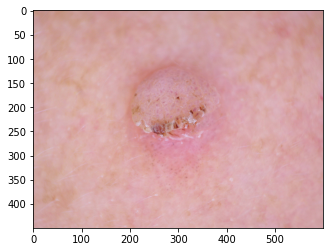

In [18]:
# 이미지 확인
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread(tile_df.iloc[6]['path'])
plt.imshow(img)

In [19]:
# 스케일링 미리 해주기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale= 1./255)

In [22]:
# train과 validation이 나누어 지지 않았기에
# 임으로 title_df를 train_test_split을 이용하여 
# train_df와 val_df로 나눔
from sklearn.model_selection import train_test_split

# 8:2 테스트와 훈련 데이터 나누기
tra_df, test_df = train_test_split(tile_df, test_size=0.2, random_state = 777)

In [23]:
# 6.7:3.3으로 train_df와 val_df 나누기
train_df, val_df = train_test_split(tra_df,test_size=0.33, random_state=777)

In [24]:
train_df

,akiec,bcc,bkl,df,mel,nv,vasc,path
2460,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/content/ham10000_images_part_1/ISIC_0026349.jpg
5525,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_2/ISIC_0030200.jpg
1318,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/content/ham10000_images_part_2/ISIC_0029630.jpg
1653,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/content/ham10000_images_part_2/ISIC_0032879.jpg
666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0029302.jpg
...,...,...,...,...,...,...,...,...
6770,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_1/ISIC_0028633.jpg
354,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_2/ISIC_0030465.jpg
6382,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_2/ISIC_0030619.jpg
3913,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_2/ISIC_0030971.jpg


In [25]:
val_df

,akiec,bcc,bkl,df,mel,nv,vasc,path
2182,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0028103.jpg
5822,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_1/ISIC_0027583.jpg
3919,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_1/ISIC_0024744.jpg
5526,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_1/ISIC_0028312.jpg
8619,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_2/ISIC_0029452.jpg
...,...,...,...,...,...,...,...,...
2131,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/content/ham10000_images_part_2/ISIC_0031915.jpg
8764,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_1/ISIC_0026359.jpg
4596,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_1/ISIC_0024583.jpg
4199,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_1/ISIC_0025614.jpg


# 4. 모델 구축 및 학습

In [26]:
# class 명을 지정('akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc')
# 임으로 나눈 train_df와 val_df를 이용하여 train_generator와 val_generator 생성
# x_col의 해당 이미지 파일 경로로 지정
# color_mod는 'rgb', class_mode는 raw로 지정
# seed는 42, batch_size는 32로 지정

batch_size=32

class_col = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory='',
    x_col = 'path',
    y_col = class_col,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'raw',
    batch_size = batch_size,
    shuffle = True,
    seed=42)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = '',
    x_col = 'path',
    y_col = class_col,
    target_size = (150, 150),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 5368 validated image filenames.
Found 2644 validated image filenames.


In [27]:
# 결과 값이 가장 좋은 드롭아웃을 사용
# 이미지 사이는 150으로 고정
# 다중 분류이기에 softmax와 손실 함수는 categorical_crossentropy를 사용
# 클래스가 7개 이기에 출력층을 7개 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = 3, padding ='same',
                 activation = 'relu', input_shape = (150, 150, 3)))
model.add(Conv2D(filters = 64, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 256, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                        

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 검증 데이터 손실(val_loss)이 증가하면, 
# 과적합 징후므로 검증 데이터 손실이 5회 증가하면 
# 학습을 조기 종료(Early Stopping)합니다. 
es = EarlyStopping(monitor='val_loss', 
                   mode='min', verbose=1, patience=5)
# Q1_model.h5에 정확도가 높은 모델 저장 
mc = ModelCheckpoint('Q1_model.h5', 
                     monitor='val_acc', mode='max', 
                     verbose=2, save_best_only=True)

In [29]:
# epochs는 30, batch_size를 32로 두고 훈련 시킴
history = model.fit(train_generator,
                    epochs = 30,
                    batch_size = 32,
                    callbacks=[es, mc],
                    validation_data = val_generator)

Epoch 1/30
168/168 [==============================] - ETA: 0s - loss: 1.0396 - acc: 0.6690
Epoch 1: val_acc improved from -inf to 0.66717, saving model to Q1_model.h5
168/168 [==============================] - 119s 614ms/step - loss: 1.0396 - acc: 0.6690 - val_loss: 1.1015 - val_acc: 0.6672
Epoch 2/30
168/168 [==============================] - ETA: 0s - loss: 0.9316 - acc: 0.6762
Epoch 2: val_acc did not improve from 0.66717
168/168 [==============================] - 83s 490ms/step - loss: 0.9316 - acc: 0.6762 - val_loss: 0.9559 - val_acc: 0.6653
Epoch 3/30
168/168 [==============================] - ETA: 0s - loss: 0.8795 - acc: 0.6827
Epoch 3: val_acc improved from 0.66717 to 0.69516, saving model to Q1_model.h5
168/168 [==============================] - 80s 475ms/step - loss: 0.8795 - acc: 0.6827 - val_loss: 0.8912 - val_acc: 0.6952
Epoch 4/30
168/168 [==============================] - ETA: 0s - loss: 0.8220 - acc: 0.7047
Epoch 4: val_acc improved from 0.69516 to 0.71218, saving mode

# 5. 학습과정 시각화




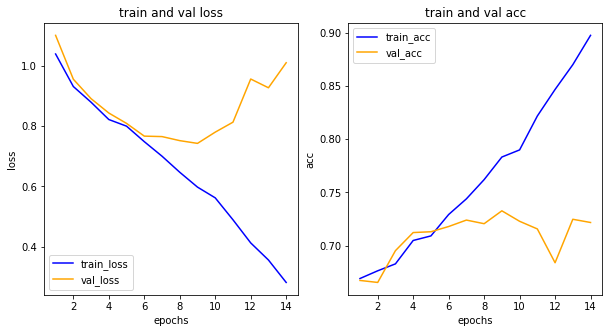

In [30]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

과적합이 epochs 6 부터 시작하는 것을 확인 가능

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras import models
from keras.models import load_model
model = load_model('Q1_model.h5')
def pred(fname):
  img = image.load_img(fname, target_size=(150, 150))
  plt.imshow(img)

  x=image.img_to_array(img)
  images = np.expand_dims(x, axis=0)

  classes = model.predict(images, batch_size=10)

  if classes[0]>0.5:
    print(fname.split('/')[-1] + " bcc")
  elif classes[0]>1.5:
    print(fname.split('/')[-1] + "bkl")
  elif classes[0]>2.5:
    print(fname.split('/')[-1] + "df")
  elif classes[0]>3.5:
    print(fname.split('/')[-1] + "mel")
  elif classes[0]>4.5:
    print(fname.split('/')[-1] + "nv")
  elif classes[0]>5.5:
    print(fname.split('/')[-1] + "vasc")
  else:
    print(fname.split('/')[-1] + " akiec")

# 6. 이미지 증식


In [32]:
# ImageDataGenerator를 이용한 이미지 증식
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale=1./255) 

## 6-1 이미지 증식 후의 train_generator, val_generator 설정과 모델 구성

In [33]:
# 위와 동일
batch_size = 32
class_col = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory='',
    x_col = 'path',
    y_col = class_col,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'raw',
    batch_size = batch_size,
    shuffle = True,
    seed=42)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = '',
    x_col = 'path',
    y_col = class_col,
    target_size = (150, 150),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 5368 validated image filenames.
Found 2644 validated image filenames.


In [34]:
# 드롭아웃으로 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = 3, padding ='same',
                 activation = 'relu', input_shape = (150, 150, 3)))
model.add(Conv2D(filters = 64, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 256, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, padding ='same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 128)       147584    
                                                      

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 검증 데이터 손실(val_loss)이 증가하면, 
# 과적합 징후므로 검증 데이터 손실이 5회 증가하면 
# 학습을 조기 종료(Early Stopping)합니다. 
es = EarlyStopping(monitor='val_loss', 
                   mode='min', verbose=1, patience=5)
# imggen_model.h5에 정확도 높은 모델 저장 
mc = ModelCheckpoint('imggen_model.h5', 
                     monitor='val_acc', mode='max', 
                     verbose=2, save_best_only=True)

In [36]:
history = model.fit(train_generator,
                    epochs = 20,
                    batch_size = 32,
                    callbacks=[es, mc],
                    validation_data = val_generator)

Epoch 1/20
168/168 [==============================] - ETA: 0s - loss: 1.0588 - acc: 0.6675
Epoch 1: val_acc improved from -inf to 0.66641, saving model to imggen_model.h5
168/168 [==============================] - 103s 610ms/step - loss: 1.0588 - acc: 0.6675 - val_loss: 1.0994 - val_acc: 0.6664
Epoch 2/20
168/168 [==============================] - ETA: 0s - loss: 0.9613 - acc: 0.6714
Epoch 2: val_acc improved from 0.66641 to 0.66906, saving model to imggen_model.h5
168/168 [==============================] - 101s 601ms/step - loss: 0.9613 - acc: 0.6714 - val_loss: 0.9868 - val_acc: 0.6691
Epoch 3/20
168/168 [==============================] - ETA: 0s - loss: 0.9227 - acc: 0.6747
Epoch 3: val_acc improved from 0.66906 to 0.67322, saving model to imggen_model.h5
168/168 [==============================] - 103s 610ms/step - loss: 0.9227 - acc: 0.6747 - val_loss: 1.0206 - val_acc: 0.6732
Epoch 4/20
168/168 [==============================] - ETA: 0s - loss: 0.8822 - acc: 0.6813
Epoch 4: val_ac

## 6-2 이미지 증식 후 학습 데이터 과정 확인

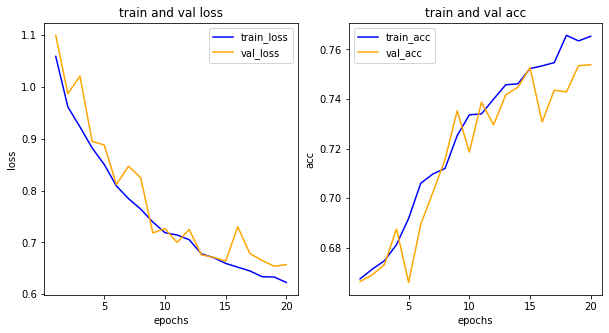

In [37]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

위의 학습보다 과적합이 줄어든 것을 확인

# 7. 데이터 전이

In [38]:
# 데이터 전이 모델 중 MobileNet 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet

# imagenet을 학습한 이미지 가져옴
mobar = MobileNet(weights = 'imagenet', input_shape = (150,150,3), include_top = False)
mobar.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 75, 75, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 75, 75, 32) 

In [39]:
# 동결 해제
for layer in mobar.layers[:-4]:
  layer.trainable = False

## 7-1 데이터 전이후 모델 구성 및 학습

In [40]:
model = Sequential()
model.add(mobar)
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4194560   
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 검증 데이터 손실(val_loss)이 증가하면, 
# 과적합 징후므로 검증 데이터 손실이 5회 증가하면 
# 학습을 조기 종료(Early Stopping)합니다. 
es = EarlyStopping(monitor='val_loss', 
                   mode='min', verbose=1, patience=5)
# best_mask_model.h5에 정확도가 높은 모델 저장
mc = ModelCheckpoint('best_mask_model.h5', 
                     monitor='val_acc', mode='max', 
                     verbose=2, save_best_only=True)

In [42]:
model.compile(optimizer = Adam(1e-4),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])


history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = val_generator,
                    callbacks=[es, mc],
                    validation_steps = 2)

Epoch 1/20
168/168 [==============================] - ETA: 0s - loss: 1.4263 - acc: 0.5944
Epoch 1: val_acc improved from -inf to 0.76562, saving model to best_mask_model.h5
168/168 [==============================] - 74s 423ms/step - loss: 1.4263 - acc: 0.5944 - val_loss: 0.8382 - val_acc: 0.7656
Epoch 2/20
168/168 [==============================] - ETA: 0s - loss: 0.7856 - acc: 0.7515
Epoch 2: val_acc did not improve from 0.76562
168/168 [==============================] - 69s 411ms/step - loss: 0.7856 - acc: 0.7515 - val_loss: 0.8112 - val_acc: 0.7344
Epoch 3/20
168/168 [==============================] - ETA: 0s - loss: 0.6379 - acc: 0.7807
Epoch 3: val_acc did not improve from 0.76562
168/168 [==============================] - 70s 415ms/step - loss: 0.6379 - acc: 0.7807 - val_loss: 0.8981 - val_acc: 0.7344
Epoch 4/20
168/168 [==============================] - ETA: 0s - loss: 0.5610 - acc: 0.8035
Epoch 4: val_acc improved from 0.76562 to 0.82812, saving model to best_mask_model.h5
168

## 7-2 모델 전이 후의 학습과정 시각화

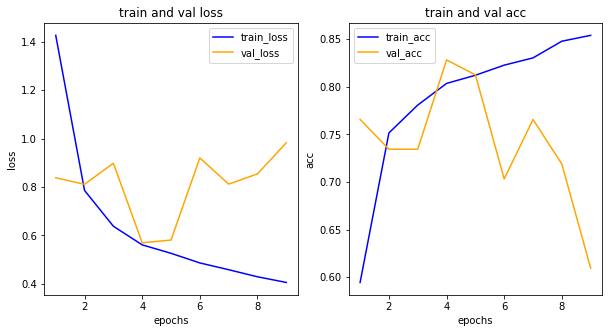

In [43]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

과적합이 많이 줄은 것을 볼 수 있습니다.

In [50]:
# test_df를 활용하여 test_generator 생성
# 단, 여기서는 정확한 평가를 위해 
# label를 삭제
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = train_datagen.flow_from_dataframe(
    dataframe = test_df,
    directory=None,
    x_col = 'path',
    y_col = None,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)

Found 2003 validated image filenames.


In [51]:
def get_steps(num_samples, batch_size):
  if(num_samples % batch_size) > 0:
    return(num_samples // batch_size) +1
  else :
    return num_samples // batch_size

In [52]:
# 예측 모델 만들기
batch_size=32
preds = model.predict(test_generator,
                      steps = get_steps(len(test_df), batch_size),
                      verbose=1)

63/63 [==============================] - 26s 414ms/step


In [53]:
preds.shape

(2003, 7)

In [54]:
preds[0]

array([2.1658736e-04, 1.3911253e-03, 1.1428093e-03, 5.2024925e-04,
       1.7767547e-04, 9.9507266e-01, 1.4788960e-03], dtype=float32)

In [56]:
prob = zip(class_col, list(preds[1]))
prob

In [57]:
sorted(list(prob), key = lambda z: z[1], reverse = True)

[('nv', 0.8537095),
 ('vasc', 0.1139648),
 ('mel', 0.020139385),
 ('bkl', 0.010296681),
 ('df', 0.0011538253),
 ('akiec', 0.00039982348),
 ('bcc', 0.00033597864)]

In [60]:
test_df

,akiec,bcc,bkl,df,mel,nv,vasc,path
3025,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_1/ISIC_0028298.jpg
2399,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/content/ham10000_images_part_1/ISIC_0027256.jpg
439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0026714.jpg
1012,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0028587.jpg
2748,0.0,1.0,0.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0026855.jpg
...,...,...,...,...,...,...,...,...
3087,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_2/ISIC_0030918.jpg
3601,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/ham10000_images_part_1/ISIC_0028836.jpg
2530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_2/ISIC_0030766.jpg
98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/content/ham10000_images_part_1/ISIC_0028080.jpg


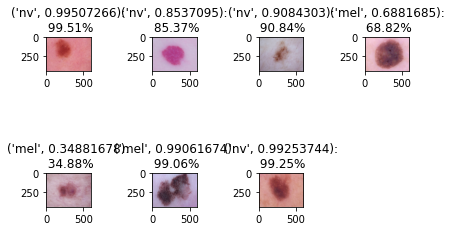

In [64]:
#모델 평가 시각화

import cv2
do_preds = preds[:7]

for i, pred in enumerate(do_preds):
  plt.subplot(2, 4, i + 1)
  prob = zip(class_col, list(pred))
  prob = sorted(list(prob), key = lambda z:z[1], reverse = True)[:2]

  image = cv2.imread(test_df.iloc[i]['path'])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.imshow(image)
  plt.title(f'{prob[0]}:\n {round(prob[0][1] *100, 2)}%')

plt.tight_layout()